Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_results=True, seed=125, epochs=4, dataset='MNIST_5k', batch_size=64, lr=0.01, loss='MSE', model='MLP', hidden_sizes=[200, 200, 200], activation='tanh', warm_up_epochs=1, algo='Top-SGD', plot_losses=True, n_experiences=2)
Namespace(task='tmp_proj_cl_task', debug=False, storage=PosixPath('../storage'), save_r

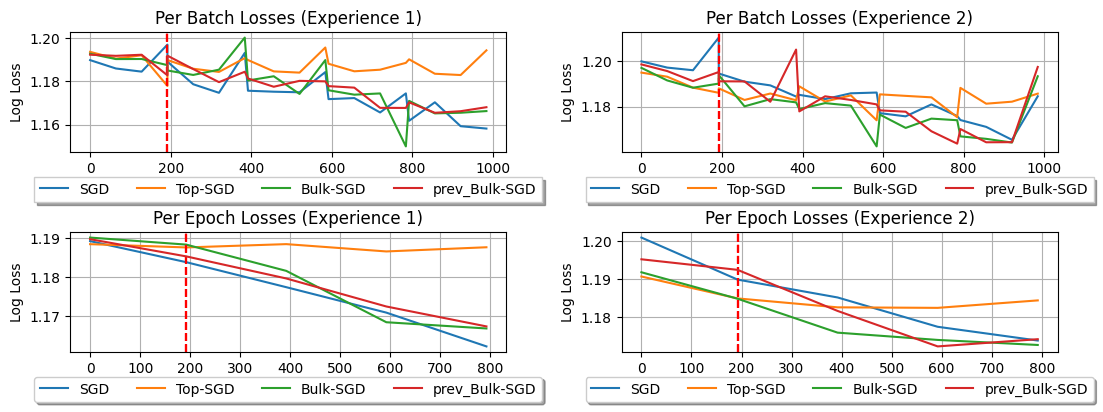

In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

# Define file paths

#Subset size 200
file_paths = [
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_152525_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_154127_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_Top-SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_143457_CL_MNIST_5k_tmp_proj_cl_task_MLP_tanh_Bulk-SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_174306_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD__hid_sizes_200-200-200.pkl"
]

with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.algo)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.algo)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot
    plt.show()

# Call the function
load_and_plot(file_paths)


In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

# Define file paths

#Subset size 200
file_paths = [
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_175224_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_prev_Bulk-SGD__hid_sizes_200-200-200.pkl",
    "/Users/dudchenko/SANDBOX/S3/S3/storage/projected_training_20241129_175309_CL_MNIST_5k_proj_on_prev_exp_cl_task_MLP_tanh_SGD__hid_sizes_200-200-200.pkl"
]

with open(file_paths[0], "rb") as file:
    results = pickle.load(file)
all_train_losses = results["all_train_losses"]
all_warm_up_losses = results["all_warm_up_losses"]

num_experiences = len(all_warm_up_losses)
fig, axes = plt.subplots(2, num_experiences, figsize=(5 * num_experiences*1.1, 4), constrained_layout=True)
if num_experiences == 1:
    axes = [[axes[0]], [axes[1]]]

# Function to load and plot data
def load_and_plot(file_paths):
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            results = pickle.load(file)
        
        args = results["args"]
        all_train_losses = results["all_train_losses"]
        all_warm_up_losses = results["all_warm_up_losses"]


        
        # Define output name for visualization

        # Plot data
        for i, (warm_up_losses, train_losses) in enumerate(zip(all_warm_up_losses, all_train_losses)):
            # Combine batch and epoch losses
            per_batch_losses = warm_up_losses[0] + train_losses[0]
            per_epoch_losses = warm_up_losses[1] + train_losses[1]

            # Combine training steps
            training_steps_per_batch = warm_up_losses[2] + train_losses[2]
            training_steps_per_epoch = warm_up_losses[3] + train_losses[3]

            # Determine end of warm-up step
            warm_up_training_steps = 0 if len(warm_up_losses[2]) == 0 else warm_up_losses[2][-1]

            # First row: Per Batch Losses
            axes[0][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[0][i].plot(training_steps_per_batch, np.log1p(per_batch_losses), label=args.algo)
            axes[0][i].set_title(f"Per Batch Losses (Experience {i + 1})")
            axes[0][i].set_xlabel("Training Step")
            axes[0][i].set_ylabel("Log Loss")
            axes[0][i].grid(True)
            axes[0][i].legend()
            axes[0][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=True, ncol=4)


            # Second row: Per Epoch Losses
            axes[1][i].axvline(x=warm_up_training_steps, color='red', linestyle='--')
            axes[1][i].plot(training_steps_per_epoch, np.log1p(per_epoch_losses), label=args.algo)
            axes[1][i].set_title(f"Per Epoch Losses (Experience {i + 1})")
            axes[1][i].set_xlabel("Training Step")
            axes[1][i].set_ylabel("Log Loss")
            axes[1][i].grid(True)
            axes[1][i].legend()
            axes[1][i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)


            print(args)

        # Save and show the plot
    plt.show()

# Call the function
load_and_plot(file_paths)
